# week４授業前課題１　アヤメの分類

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## 【今回の課題の条件】
* 使用する特徴量は２つ
* 分類するアヤメは２種の２値分類

# 【課題１】練習のために特徴量とカテゴリを選択

In [2]:
# データの読み込み
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# カラム名
X_names = ['sepal_length','sepal_width','petal_length','petal_width']
# 特徴量をデータフレームに
X = pd.DataFrame(iris.data,columns=X_names)
# 目的変数をデータフレームに
y = pd.DataFrame(iris.target,columns=['Species'])
# 結合
df = pd.concat([X,y],axis=1)
# 特徴量を絞る
df = df[['sepal_length','petal_length','Species']]
# 目的変数を絞る
df = df[df.Species >= 1]
df.head()

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


# 【問題2】データの分析

Text(0, 0.5, 'petal_length')

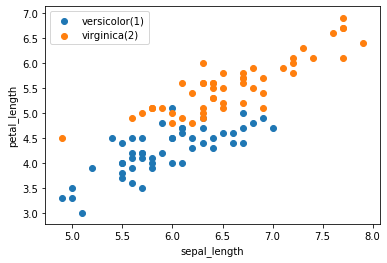

In [4]:
versicolor = df[df.Species==1]
virginica = df[df.Species==2]
plt.scatter(versicolor.sepal_length,versicolor.petal_length,label='versicolor(1)')
plt.scatter(virginica.sepal_length,virginica.petal_length,label='virginica(2)')
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')

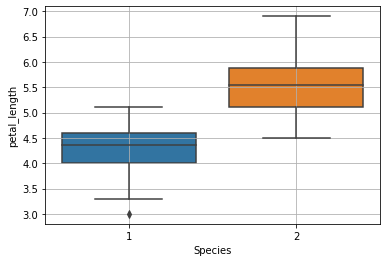

In [5]:
sns.boxplot(x='Species',y='petal_length',data=df)
plt.grid()

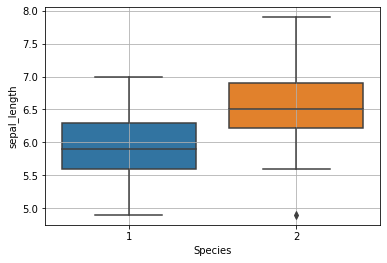

In [6]:
sns.boxplot(x='Species',y='sepal_length',data=df)
plt.grid()

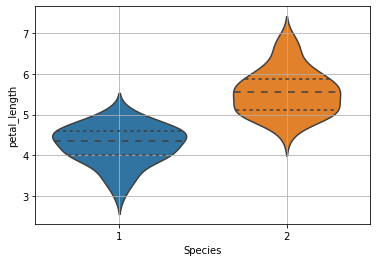

In [7]:
sns.violinplot(x='Species',y='petal_length',data=df,inner='quartile')
plt.grid()

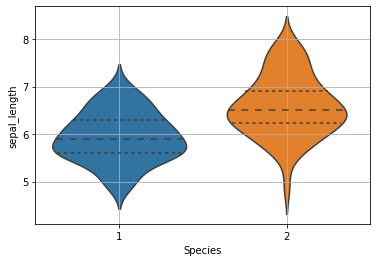

In [8]:
sns.violinplot(x='Species',y='sepal_length',data=df,inner='quartile')
plt.grid()

# 【問題3】前処理・訓練用データと検証用データの分割

In [9]:
# ndarrayに変換する
X = df.drop('Species',axis=1).values
y = df.Species.values

#訓練データとテストデータに分ける
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# 【問題4】前処理・標準化

In [10]:
# 標準化のためのライブラリをインポート
from sklearn.preprocessing import StandardScaler

# 標準化初期化
sc = StandardScaler()
# 訓練用データで標準化
sc.fit(X_train)

# 訓練データの特徴量を標準化
X_train_std = sc.transform(X_train)
# テストデータの特徴量を標準化
X_test_std = sc.transform(X_test)

# 【問題5】学習と推定

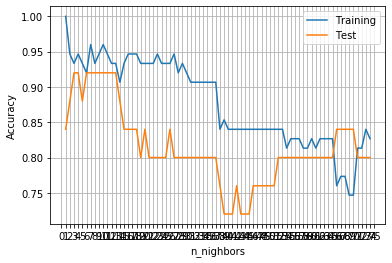

In [11]:
# k-NNをインポート
from sklearn.neighbors import KNeighborsClassifier

# 最適なn_neighborを見つける関数
def k_NN(n_start=1,n_end=75):
    # 正解率を入れるリスト
    train_accuracy = []
    test_accuracy = []

    # n_neighborsを変化させながらふさわしい値を探す
    for k in range(n_start,n_end):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_std,y_train)
        train_accuracy.append(model.score(X_train_std,y_train))
        test_accuracy.append(model.score(X_test_std,y_test))

    # 可視化
    plt.plot(range(n_start,n_end),train_accuracy,label='Training')
    plt.plot(range(n_start,n_end),test_accuracy,label='Test')
    plt.xticks(np.arange(0,n_end + 1,1))
    plt.xlabel('n_nighbors')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    
k_NN(1,75)

* n_neighborが5と15あたりでtrainとtestの乖離が小さくなっている．
* その後は乖離幅が大きくなっているので，１～20で再計算してみる．

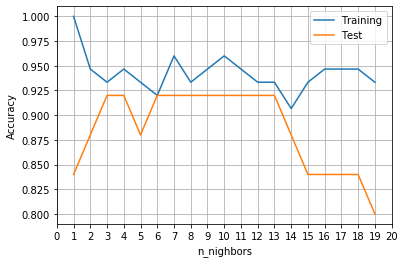

In [12]:
k_NN(1,20)

n_neighborが６の時，最も乖離幅が小さいので，６で推定を行う．

In [13]:
# 検証用データで推定
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train_std,y_train)
y_pred = model.predict(X_test_std)
y_pred

array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

# 【問題6】評価
* １．accuracy，precision，recall，F値の計算
* ２．混合行列をscikit-learnを使い表示する
* ３．4種類の指標値の意味について簡単に調査して文章でまとめる

In [14]:
# 評価指標ライブラリ
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print('accuracy:{}'.format(accuracy_score(y_test,y_pred)))
print('precision:{}'.format(precision_score(y_test,y_pred)))
print('recall:{}'.format(recall_score(y_test,y_pred)))
print('F値:{}'.format(f1_score(y_test,y_pred)))

accuracy:0.92
precision:1.0
recall:0.8461538461538461
F値:0.9166666666666666


In [15]:
# 混合行列
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test,y_pred)
pd.DataFrame(m,index=['観測０','観測１'],columns=['予測０','予測１'])

,予測０,予測１
観測０,11,2
観測１,0,12


In [16]:
a = [['TP（真陽性）','FN（偽陰性）'],['FP（偽陽性）','TF（真陰性）']]
pd.DataFrame(a,index=[['実際の分類結果','実際の分類結果'],['ポジティブな分類','ネガティブな分類']],
            columns=[['予測結果','予測結果'],['ポジティブな予測結果','ネガティブな予測結果']])

予測結果           
                 ポジティブな予測結果 ネガティブな予測結果
実際の分類結果 ポジティブな分類    TP（真陽性）    FN（偽陰性）
        ネガティブな分類    FP（偽陽性）    TF（真陰性）

### accuracy（正解率）
* 全体に対して予測が当たった割合
* (TP + TF) / (TP + FN + FP + TF)

In [17]:
accuracy = (m[0,0] + m[1,1]) / m.sum()
accuracy

0.92

### precision（適合率，精度）
* ポジティブと予測されたもののうち、実際にポジティブであったものの割合
* TP / (TP + FP)
* ex）異常検知システムがアラートを出したうち，実際に異常であった割合

In [18]:
precision = m[0,0] / m[:,0].sum()
precision

1.0

### recall（再現率，検出率）
* 実際はポジティブに分類すべきもののうち，正しくポジティブに分類できたものの割合
*  TP / (TP + FN)
* ex）病気の診断予測で，実際の病気データのうち，病気であると予測できた割合

In [19]:
recall = m[0,0] / m[0,:].sum()
recall

0.8461538461538461

### F値
* precisionとrecallをバランス良く持ち合わせているかを示す指標
* 2 * (precision * recall) / (precision + recall)
* precision,recallのどちらを優先するか決まっていない時点でモデルを総合的に評価する場合
* precisionは高くても、recallが低いモデルでないか（逆もしかり）を判断する場合

* マクロ平均
* マイクロ平均

In [20]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.9166666666666666

# 【問題7】可視化

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

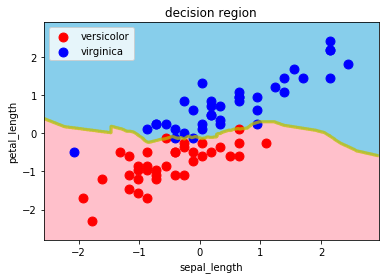

In [22]:
decision_region(X_train_std,y_train,model,step=0.01, 
                title='decision region', xlabel='sepal_length', ylabel='petal_length', 
                target_names=['versicolor', 'virginica'])

In [23]:
def plot_decision_region(X,y,model,resolution=0.01):
    # マーカーとcolorマップの準備
    markers = ('s','x','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min,x1_max = X[:,0].min() - 1 ,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1 ,X[:,1].max() + 1
    # グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    
    Z = model.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                   y=X[y==cl,1],
                   alpha=0.8,
                   c=colors[idx],
                   label=cl,
                   edgecolors='black')

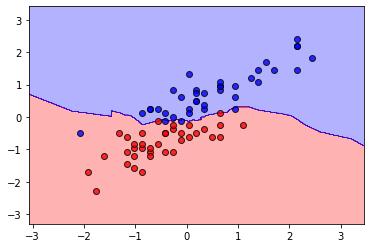

In [24]:
plot_decision_region(X_train_std,y_train,model)

# 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

* 最近傍法
* ロジスティック回帰
* SVM
* 決定木
* ランダムフォレスト
## １．ロジスティック回帰

In [25]:
def eval_func(y_test,y_pred):
    evaluation = accuracy_score,precision_score,recall_score,f1_score
    score_list = []
    #col_name = []
    for func in evaluation:
        score = func(y_test,y_pred)
        score_list.append(score)
    #col_name = ['Accuracy','Precision','Recall','F1']
    #score_df = pd.DataFrame(score_list,columns=col_name)
    return score_list

C:\Users\miyas\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


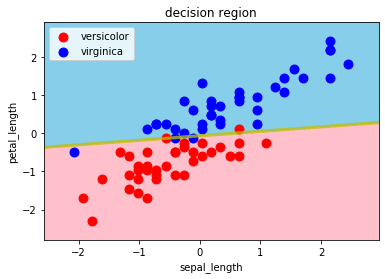

In [48]:
#ロジスティック回帰モデル
from sklearn.linear_model import LogisticRegression
#ロジスティック回帰クラスの初期化
lr = LogisticRegression()

#訓練データで学習
lr.fit(X_train_std,y_train)
# 推定
y_pred_lr = lr.predict(X_test_std)

#可視化
decision_region(X_train_std,y_train,lr,step=0.01, 
                title='decision region', xlabel='sepal_length', ylabel='petal_length', 
                target_names=['versicolor', 'virginica'])

線形分離できるものにしか対応できない．

In [33]:
score_lr = eval_func(y_test,y_pred_lr)

## ２．ＳＶＭ

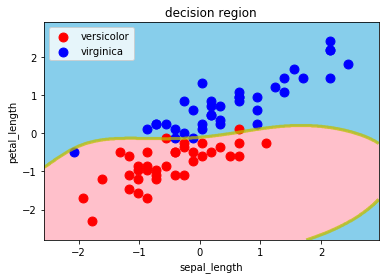

In [49]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train_std,y_train)
y_pred_sv = sv.predict(X_test_std)
decision_region(X_train_std,y_train,sv,step=0.01, 
                title='decision region', xlabel='sepal_length', ylabel='petal_length', 
                target_names=['versicolor', 'virginica'])

非線形に分離してくれている

In [36]:
score_sv = eval_func(y_test,y_pred_sv)

## ３．決定木

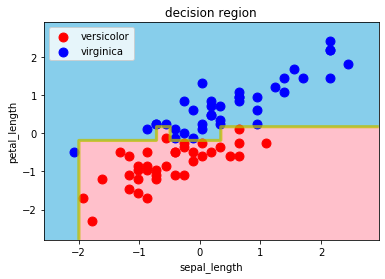

In [50]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_std,y_train)
y_pred_tree = tree.predict(X_test_std)
decision_region(X_train_std,y_train,tree,step=0.01, 
                title='decision region', xlabel='sepal_length', ylabel='petal_length', 
                target_names=['versicolor', 'virginica'])

決定領域がかなり柔軟．過学習しそう．

In [39]:
score_tree = eval_func(y_test,y_pred_tree)

## ４．ランダムフォレスト

C:\Users\miyas\Anaconda3\envs\test\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


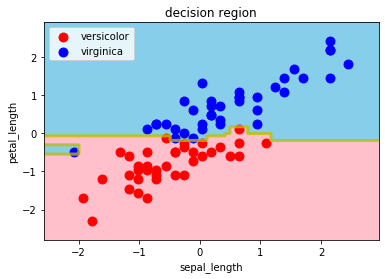

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std,y_train)
y_pred_rf = rf.predict(X_test_std)
decision_region(X_train_std,y_train,rf,step=0.01, 
                title='decision region', xlabel='sepal_length', ylabel='petal_length', 
                target_names=['versicolor', 'virginica'])

決定木よりさらに定領域が柔軟にみえる．こちらも過学習しそう．

In [41]:
score_rf = eval_func(y_test,y_pred_rf)

In [47]:
col_name = ['Accuracy','Precision','Recall','F1'] 
inx_name = ['Logistic','SVM','DecisionTree','RandomForest']
all_score = pd.DataFrame((score_lr,score_sv,score_tree,score_rf),columns=col_name,index=inx_name)
all_score

,Accuracy,Precision,Recall,F1
Logistic,0.92,1.0,0.846154,0.916667
SVM,0.92,1.0,0.846154,0.916667
DecisionTree,0.88,1.0,0.769231,0.869565
RandomForest,0.92,1.0,0.846154,0.916667


決定木のみ，他よりスコアが悪いのは意外．ほかが変わらないのも意外．                 
柔軟な決定領域のせいで，線形分離可能なデータに対してはロバスト性に欠ける？？                     
plot結果からは，ランダムフォレストが最もよく分類できているように見えたが，スコア上は差はない．                 
線形分離可能なら，思ったよりロジスティックは有効だった．